# Pandas Tables

In [1]:

import pandas
import os

data_directory = '../data'
food_prices_filename = 'world_monthly_food_prices.csv'
food_prices_path = os.path.join(data_directory, food_prices_filename)
food_prices = pandas.read_csv(food_prices_path)

print('Whole dataframe:', food_prices)


Whole dataframe:                                      Domain Code                  Domain  \
0                                             CP  Consumer Price Indices   
1                                             CP  Consumer Price Indices   
2                                             CP  Consumer Price Indices   
3                                             CP  Consumer Price Indices   
4                                             CP  Consumer Price Indices   
..                                           ...                     ...   
176                                           CP  Consumer Price Indices   
177                                           CP  Consumer Price Indices   
178                                           CP  Consumer Price Indices   
179                                           CP  Consumer Price Indices   
180  FAOSTAT Date: Wed Aug 17 16:12:56 CEST 2016                     NaN   

     AreaCode AreaName  ElementCode ElementName  ItemCode  \
0      50

In [2]:
print('List of column names:', food_prices.columns)


List of column names: Index(['Domain Code', 'Domain', 'AreaCode', 'AreaName', 'ElementCode',
       'ElementName', 'ItemCode', 'ItemName', 'Year', 'Value', 'Flag',
       'FlagD'],
      dtype='object')


In [3]:
print('Specific column:', food_prices['Value'])


Specific column: 0       99.5
1      101.5
2      106.5
3      112.5
4      119.2
       ...  
176    210.3
177    224.2
178    239.0
179    250.9
180      NaN
Name: Value, Length: 181, dtype: float64


In [4]:
print('Specific value in that column:', food_prices['Value'][6])


Specific value in that column: 132.2


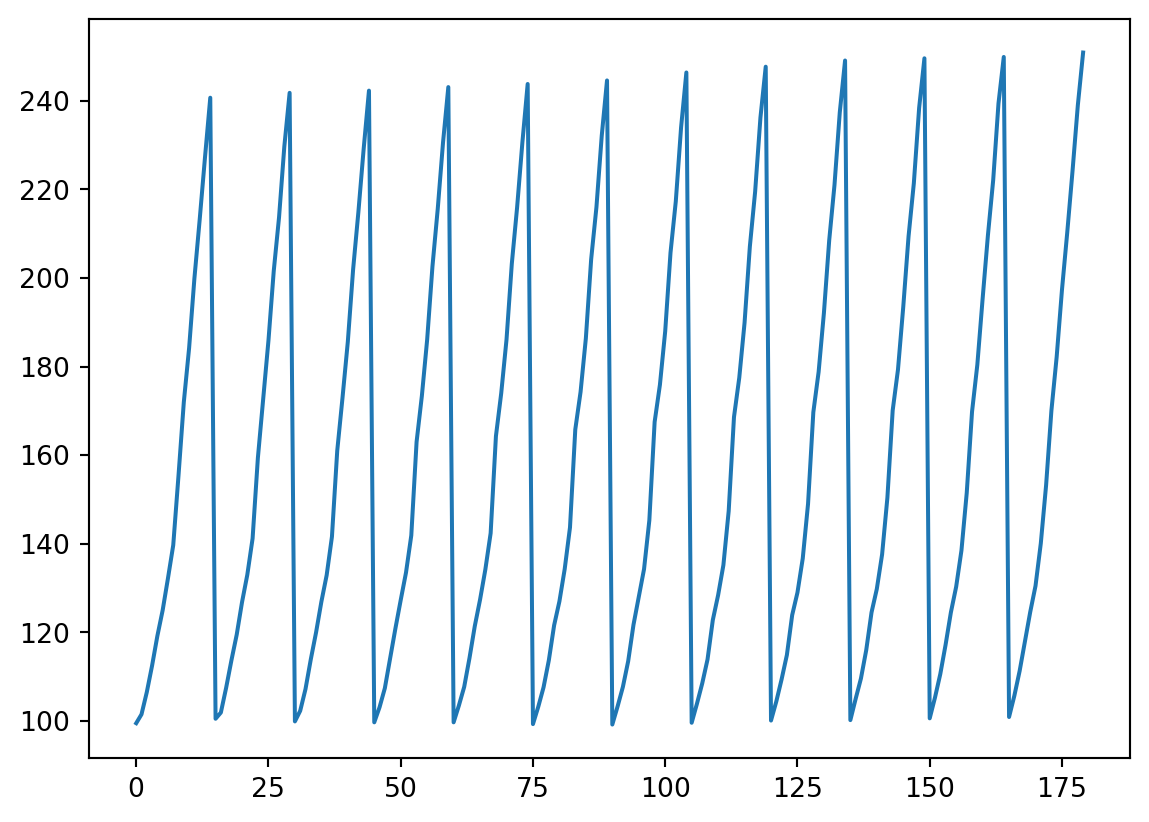

In [5]:

import matplotlib
from matplotlib import pyplot as plt
plt.plot(food_prices['Value'])
plt.show() 

df:
           A         B         C         D
0  0.336581  0.923754 -0.277124  0.388604
1 -1.295428  3.296657 -0.698246  0.245552
2 -1.086536  1.187113 -0.153344 -1.264476
3  0.798694  1.330577 -0.113975 -0.060949
4 -0.076321 -0.240310  0.728421 -0.384309
5  0.634212  1.605129  1.415844  0.385849
a
 [[ 0.33658127  0.92375415 -0.27712413  0.38860406]
 [-1.2954285   3.29665716 -0.69824576  0.24555238]
 [-1.0865361   1.18711302 -0.15334368 -1.26447611]
 [ 0.79869365  1.33057707 -0.11397528 -0.06094946]
 [-0.07632075 -0.24031028  0.72842085 -0.38430931]
 [ 0.6342119   1.60512881  1.41584369  0.38584939]]
csv read as a df
                                           Country Name Country Code  \
0                                          Afghanistan          AFG   
1                                          Afghanistan          AFG   
2                                          Afghanistan          AFG   
3                                          Afghanistan          AFG   
4                 

C:\Users\jajohns\AppData\Local\Temp\ipykernel_26860\2184278581.py:107: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



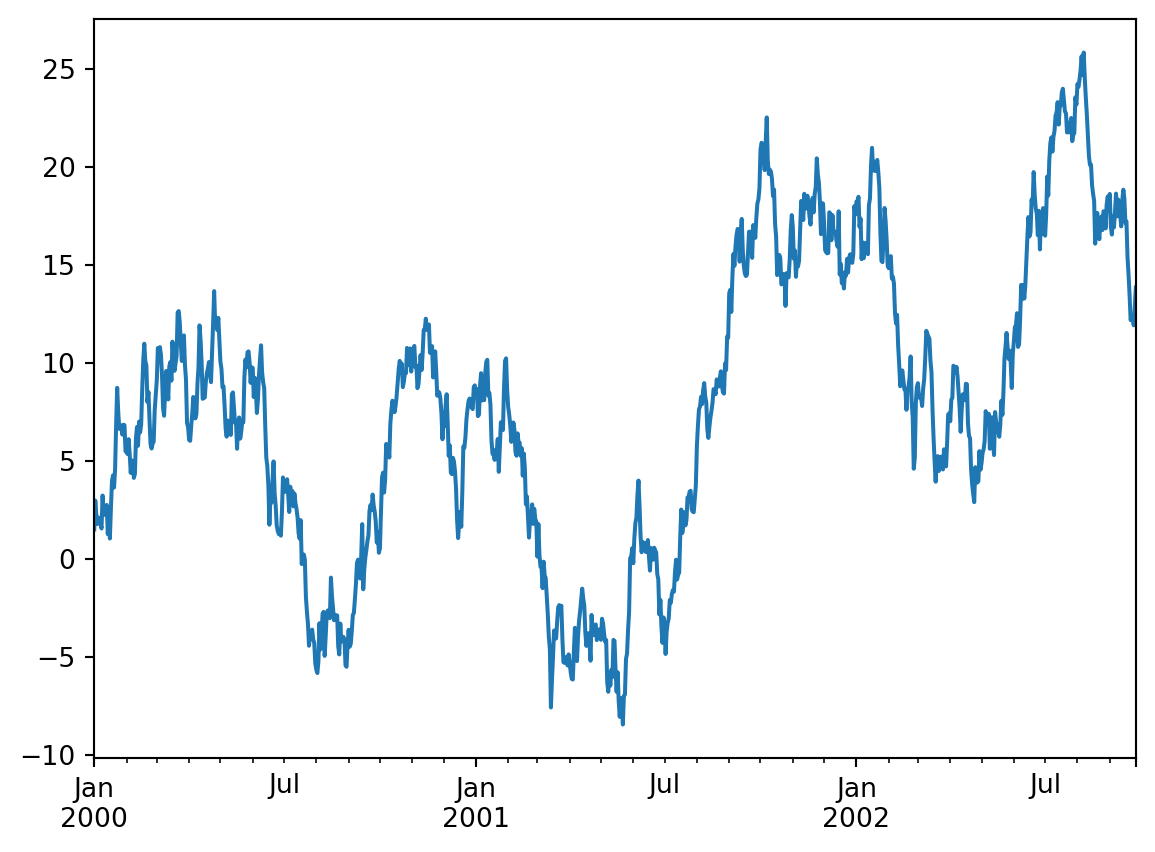

In [6]:

import os

import numpy as np
import pandas as pd

# Set a seed value for the random generator
np.random.seed(48151623)

# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

# Pandas is very detailed in dealing with dates and all the quirks (leap year?) that this leads to.
dates = pd.date_range('20130101', periods=6)

# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
print('df:\n', df)


df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

# df.head()
# print(df.index)
# print(df.columns)
df.describe()

# Also note that a dataframe is really just a numpy array dressed up with extra trappings. If you want you
# can get back the raw array (though this might lose a lot of functionality).
a = df.to_numpy()
print('a\n', a)

# Sorting Values:

# Also, I want to illustrate THE MOST COMMON MISTAKE people make with Pandas.

# The sort_values method (a method is just a function attached to an object) returns a NEW modified dataframe.
# Thus, in the line below, if you just printed df, it would not be sorted because we didn't use the returned value.
df.sort_values(by='B')
# print('Not sorted:\n', df)

# Easy way to get around this is just to assign the returned dataframe to a variable (even the input variable)
df = df.sort_values(by='B')
# print('Sorted with return:\n', df)

# Alternatively, if you hate returning things, there is the inplace=True command, which will modify the df ... inplace.
df.sort_values(by='B', inplace=True)
# print('Sorted inplace:\n', df)

## Selection/subsetting of data

# Selecting a single column, which yields a Series, equivalent to df.A
df['A']
df.A

# Selecting via [], which slices the rows.
df[0:3] # CAN BE SLOW

# Note, slicing above, which uses the
# standard Python / Numpy expressions for selecting and setting are intuitiveits best to use
# the optimized pandas data access methods, .at, .iat, .loc and .iloc.

## Selecting by LABELS, loc and iloc

r = df.loc[0] # 0-th row.

# print('r', r)

# Discuss difference between df['A'] and df.loc[0]
r = df.loc[0, 'A']

r = df.loc[:, 'A'] # Colon is a slice, an empty colon means ALL the values.

# OPTIMIZATION:
# for faster single point access, use:
r = df.at[0, 'A']

# SELECTING BY POSITION
r = df.iloc[3]

# Selecting with slices
r = df.iloc[3:5, 0:2]

# Slices again with an empty slice.
r = df.iloc[1:3, :]

r = df.iloc[:, 1:3]

# SIMILAR OPTIMIZATION:
r = df.iat[1, 1]

# Boolean indexing
# Using a single column’s values to select data.
r = df[df['A'] > 0]

# Make a copy (why?) and add a column
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
r = df2[df2['E'].isin(['two', 'four'])]


# Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))

# Missing data

# First we're going to create a new df by "reindexing" the old one, which will shuffle the data into a new
# order according to the index provided. At the same time, we're going to add on a new, empty column
# EE, which we set as 1 for the first two obs.

df1 = df.reindex(index=[2, 0, 1, 3], columns=list(df.columns) + ['EE'])
df1.loc[0:1, 'EE'] = 1
# print(df1)

# Apply: Similar to R. Applies a function across many cells (fast because it's vectorized)
df.apply(np.cumsum)
df.apply(lambda x: x.max() - x.min())

# Concat
s = pd.Series(range(0, 6))
# print('s', s)

r = pd.concat([df, s]) # Concatenate it, default is by row, which just puts it on the bottom.

r = pd.concat([df, s], axis=1) # Concatenate as a new column

# print(r) # Result when concatenating a series of the same size.

s = pd.Series(range(0, 7))
r = pd.concat([df, s], axis=1) # Concatenate as a new column

s = pd.Series(range(0, 2))
r = pd.concat([df, s], axis=1) # Concatenate as a new column

# Join
# SQL style merges. See the Database style joining section.

left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

# print(left)
# print(right)

df = pd.merge(left, right, on='key')

# print('df:\n', df)

# Stacking
stacked = df.stack()
# print('stacked:\n', stacked)


# Pivot Tables
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

# print(df) # SPREADSHEET VIEW
df = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
# print(df) # Multiindexed (Pivot table) view.

# NOTICE that a pivot table is just the above date but where specific things have been made into multi-level
# indices.

# PLOTTING
ts = pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
ts.plot()
import matplotlib.pyplot as plt
# plt.show()


# Writing to files

df.to_csv('foo.csv')

# Reading files:

# FIRST NOTE, here we are using relative paths (which you should almost always do too). the ../ means go up one level.
# this path works if you organized your data into the folder structure I suggested.
wdi_filename = "WDI_CO2_data.csv"
wdi_path = os.path.join(data_directory, wdi_filename)
df = pd.read_csv(wdi_path)

print('csv read as a df\n', df)

# For reference, here's the Excel version
# df = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

cols = list(df.columns)

# Make a subset of only 2 cols
r = df[['Country Code', '1970 [YR1970]']]
# print(r)

r = df.loc[df['Country Code'] == 'CAN']
# print('r', r)

rr = r.loc[df['Series Name'] == 'Total greenhouse gas emissions (kt of CO2 equivalent)']
print(rr)

# Class exercise: Plot the emissions of CO2 for Canada (or whereever I don't care).